In [2]:
%load_ext autoreload
%autoreload 2

In [147]:
graphics_path = '../reports/figures/'

In [227]:
from src.data.data_writer import ArcticReader

# Create Re-Sampled Bars

## Define Sample Period

In [118]:
import pandas as pd, numpy as np

start = '1/1/2017'
end = '9/18/2019'

## Get Average Estimates

In [138]:
avg_path = '../data/interim/XBTUSD averages 11Nov2014_11Nov2014.csv'
avg = pd.read_csv(avg_path, index_col=0, parse_dates=True)
avg.head()

,price,size
2014-11-22 00:00:00,NaN,NaN
2014-11-22 00:01:00,NaN,NaN
2014-11-22 00:02:00,NaN,NaN
2014-11-22 00:03:00,NaN,NaN
2014-11-22 00:04:00,NaN,NaN


In [152]:
rs = avg.astype(float).resample('D').sum()
avg_ticks = rs.loc[start:end, 'price'].mean()
avg_contracts = rs.loc[start:end, 'size'].mean()
print(f"Avg Ticks/Day: {avg_ticks}")
print(f"Avg Contracts/Day: {avg_contracts}")

Avg Ticks/Day: 390651.5862764884
Avg Contracts/Day: 1694306800.6387486


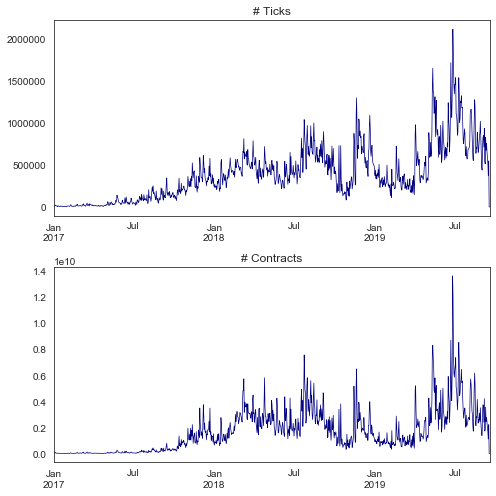

In [222]:
sns.set_style('white')
fig, axes = plt.subplots(2, 1, figsize=(7,7))

rs.loc[start:end, 'price'].plot(ax=axes[0], color='navy', lw=0.7)
axes[0].set_title('# Ticks', fontsize=13)
rs.loc[start:end, 'size'].plot(ax=axes[1], color='navy', lw=0.7)
axes[1].set_title('# Contracts', fontsize=13)

fig.tight_layout()
fig.savefig(graphics_path+'XBTUSD daily averages')

In [151]:
rs.loc[start:end, 'price'].mean()

390651.5862764884

# Baseline: Time-Sampled Bars

In [116]:
from src.data import cleaning

In [115]:
xbt_1m = pd.read_csv('../data/raw/XBTUSD_1m.csv', parse_dates=True, index_col=0)
xbt_1d = cleaning.resample_ohlc(cleaning.clean_ohlc(xbt_1m))
daily_sample = xbt_1d.loc[start:end]

,Open,High,Low,Close,Volume
timestamp,,,,,
2011-12-31 07:51:00,438,438,438,438,2
2011-12-31 07:52:00,438,438,438,438,2
2011-12-31 07:53:00,438,438,438,438,2
2011-12-31 07:54:00,438,438,438,438,2
2011-12-31 07:55:00,438,438,438,438,2


## Calculate Returns

In [122]:
daily_returns = np.log(daily_sample['Close']).diff().dropna()

# Tick Bars

In [228]:
from mlfinlab.data_structures import standard_data_structures, imbalance_data_structures

In [150]:
file_path = '../data/raw/XBTUSD mlfinlab format 11NOV2014_21SEP2019.csv'

In [153]:
tick_thresh = int(avg_ticks)
tick_bars = standard_data_structures.get_tick_bars(file_path, threshold=tick_thresh, verbose=True)

Reading data in batches:
Batch number: 0
Batch number: 1
Batch number: 2
Batch number: 3
Batch number: 4
Batch number: 5
Batch number: 6
Batch number: 7
Batch number: 8
Batch number: 9
Batch number: 10
Batch number: 11
Batch number: 12
Batch number: 13
Batch number: 14
Batch number: 15
Batch number: 16
Batch number: 17
Batch number: 18
Batch number: 19
Returning bars 



## Tick Returns

In [156]:
tick_returns = np.log(tick_bars['close']).diff().dropna()

# Volume Bars

In [164]:
volume_thresh = int(avg_contracts)
volume_bars = standard_data_structures.get_volume_bars(file_path, threshold=volume_thresh, verbose=True)

Reading data in batches:
Batch number: 0
Batch number: 1
Batch number: 2
Batch number: 3
Batch number: 4
Batch number: 5
Batch number: 6
Batch number: 7
Batch number: 8
Batch number: 9
Batch number: 10
Batch number: 11
Batch number: 12
Batch number: 13
Batch number: 14
Batch number: 15
Batch number: 16
Batch number: 17
Batch number: 18
Batch number: 19
Returning bars 



## Volume Returns

In [176]:
volume_returns = np.log(volume_bars['close']).diff().dropna()

# "Dollar" Bars
The package is going to calculate this wrong but :shrug:

In [186]:
avg_dollar = rs.prod(axis=1).median()
thresh_dollar = int(avg_dollar)
dollar_bars = standard_data_structures.get_dollar_bars(file_path, threshold=thresh_dollar, verbose=True)

Reading data in batches:
Batch number: 0
Batch number: 1
Batch number: 2
Batch number: 3
Batch number: 4
Batch number: 5
Batch number: 6
Batch number: 7
Batch number: 8
Batch number: 9
Batch number: 10
Batch number: 11
Batch number: 12
Batch number: 13
Batch number: 14
Batch number: 15
Batch number: 16
Batch number: 17
Batch number: 18
Batch number: 19
Returning bars 



## Dollar Returns

In [190]:
dollar_returns = np.log(dollar_bars['close']).diff().dropna()

# Tick Imbalance Bars

In [229]:
tick_imbalance_bars = imbalance_data_structures.get_tick_imbalance_bars(file_path, num_prev_bars=10, exp_num_ticks_init=tick_thresh)

Reading data in batches:
Batch number: 0


C:\Users\BZSJ8M\AppData\Local\conda\conda\envs\mlfinlab\lib\site-packages\mlfinlab\data_structures\imbalance_data_structures.py:100: RuntimeWarning: invalid value encountered in greater
  if np.abs(cum_theta) > self.exp_num_ticks * np.abs(self.expected_imbalance):


Batch number: 1
Batch number: 2
Batch number: 3
Batch number: 4
Batch number: 5
Batch number: 6
Batch number: 7
Batch number: 8
Batch number: 9
Batch number: 10
Batch number: 11
Batch number: 12
Batch number: 13
Batch number: 14
Batch number: 15
Batch number: 16
Batch number: 17
Batch number: 18
Batch number: 19
Returning bars 



MemoryError: Unable to allocate array with shape (170601945, 6) and data type object

# Plot Results

In [131]:
import matplotlib as mpl, matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

%matplotlib inline
mpl.rcParams['savefig.dpi'] = 300

In [197]:
sns.set_style('whitegrid')

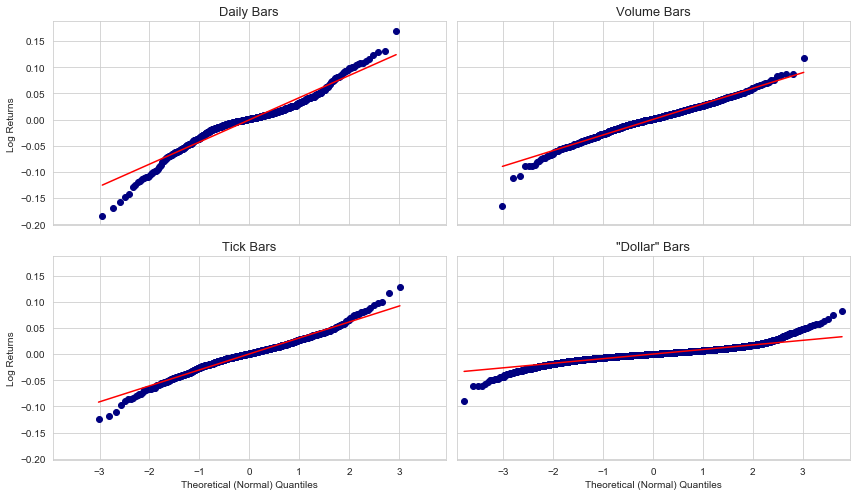

In [200]:
fig, axes = plt.subplots(2, 2, figsize=(12,7), sharey=True, sharex=True)

fit = False

qqplot(daily_returns.loc['2018':], fit=False, line='s', ax=axes[0,0], color='navy')
axes[0,0].set_title('Daily Bars', fontsize=13)
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('Log Returns')

qqplot(tick_returns.loc['2018':], fit=False, line='s', ax=axes[1,0], color='navy')
axes[1,0].set_title('Tick Bars', fontsize=13)
axes[1,0].set_xlabel('Theoretical (Normal) Quantiles')
axes[1,0].set_ylabel('Log Returns')

qqplot(volume_returns.loc['2018':], fit=False, line='s', ax=axes[0,1], color='navy')
axes[0,1].set_title('Volume Bars', fontsize=13)
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('')

qqplot(dollar_returns.loc['2018':], fit=False, line='s', ax=axes[1,1], color='navy')
axes[1,1].set_title('"Dollar" Bars', fontsize=13)
axes[1,1].set_xlabel('Theoretical (Normal) Quantiles')
axes[1,1].set_ylabel('')

fig.tight_layout()
fig.savefig(graphics_path + 'XBTUSD Bar Type Comparison')

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12,7), sharey=True, sharex=True)

fit = False

qqplot(daily_returns.loc['2018':], fit=False, line='s', ax=axes[0,0], color='navy')
axes[0,0].set_title('Daily Bars', fontsize=13)
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('Log Returns')

qqplot(tick_returns.loc['2018':], fit=False, line='s', ax=axes[1,0], color='navy')
axes[1,0].set_title('Tick Bars', fontsize=13)
axes[1,0].set_xlabel('Theoretical (Normal) Quantiles')
axes[1,0].set_ylabel('Log Returns')

qqplot(volume_returns.loc['2018':], fit=False, line='s', ax=axes[0,1], color='navy')
axes[0,1].set_title('Volume Bars', fontsize=13)
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('')

qqplot(dollar_returns.loc['2018':], fit=False, line='s', ax=axes[1,1], color='navy')
axes[1,1].set_title('"Dollar" Bars', fontsize=13)
axes[1,1].set_xlabel('Theoretical (Normal) Quantiles')
axes[1,1].set_ylabel('')

fig.tight_layout()
fig.savefig(graphics_path + 'XBTUSD Bar Type Comparison')